In [1]:
import numpy as np
import helpers_and_variables as hlp
import ML_helpers as ml_hlp
import shap
import random

# import pixiedust
# %%pixie_debugger

In [2]:
"""
read the data
"""
labels = hlp.load_list_from_json_file()
main_dict = hlp.load_dict_from_json_file()

In [3]:
# # remove vem man bor med
# # keys = main_dict.keys()

# # for key in keys:
# #     d = main_dict[key]
# #     d_keys = list(d.keys())
# #     for d_key in d_keys:
# #         if d_key == "Q1a":
# #             del main_dict[key][d_key]

# split and balance

In [16]:
"""
Get a cleaned data list, which text for each patient
"""
data_list = hlp.get_data_list_from_main_dict(main_dict, stemm=False)
x_train, x_test, y_train, y_test = ml_hlp.get_train_test_split_data(data_list, labels[:len(data_list)], 
                                                  test_size=0.33, random_state=50)
# regularisation

# check hugging face for corpus text in swedish
# convert dates into information
# Self orginised map

In [17]:
""" 
vectorize as tfidf
"""
vectorizer = ml_hlp.get_tfidf_vectorization_model(data_list)
features = vectorizer.get_feature_names()
print("Number of features for each patient is: ", len(features))

X_train_vectorized = ml_hlp.get_tfidf_vectorized_data(tfidf_model=vectorizer,
                                                      to_be_vectorized_data=x_train)
X_test_vectorized = ml_hlp.get_tfidf_vectorized_data(tfidf_model=vectorizer,
                                                      to_be_vectorized_data=x_test)

Number of features for each patient is:  4259


In [18]:
X_train = ml_hlp.get_csr_matrix(X_train_vectorized)
X_test = ml_hlp.get_csr_matrix(X_test_vectorized)
Y_train = np.array(y_train, dtype='float')
Y_test = np.array(y_test, dtype='float')

"""
check the balance of labels
"""
unique_train = np.unique(Y_train, return_counts=True); unique_test = np.unique(Y_test, return_counts=True)
print("Training data, labels are: {0}  and prop.: {1}".format(unique_train[0], unique_train[1]/len(Y_train)))
print("Test data, labels are: {0}  and prop.: {1}".format(unique_test[0], unique_test[1]/len(Y_test)))

Training data, labels are: [1. 2.]  and prop.: [0.5462963 0.4537037]
Test data, labels are: [1. 2.]  and prop.: [0.56807512 0.43192488]


# Machine Learning #

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# lr.fit(X_train, Y_train)
# ml_hlp.get_AUC_ROC_value(X_test, Y_test, lr)

ml_hlp.get_cross_validation_scores(lr, X_train, Y_train, cv=5);

0.58 accuracy with a standard deviation of 0.03


In [20]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', probability=True)
# svm.fit(X_train, Y_train)
# ml_hlp.get_AUC_ROC_value(X_test, Y_test, svm)
ml_hlp.get_cross_validation_scores(svm, X_train, Y_train, cv=5);

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = 'entropy', random_state=50)
# rf.fit(X_train, Y_train)
# ml_hlp.get_AUC_ROC_value(X_test, Y_test, rf)
ml_hlp.get_cross_validation_scores(rf, X_train, Y_train, cv=5);

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# knn.fit(X_train, Y_train)
# ml_hlp.get_AUC_ROC_value(X_test, Y_test, knn)
ml_hlp.get_cross_validation_scores(knn, X_train, Y_train, cv=5);

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 50)
# dt.fit(X_train, Y_train)
# ml_hlp.get_AUC_ROC_value(X_test, Y_test, dt)
ml_hlp.get_cross_validation_scores(dt, X_train, Y_train, cv=5);

0.57 accuracy with a standard deviation of 0.02
0.58 accuracy with a standard deviation of 0.04
0.54 accuracy with a standard deviation of 0.05
0.53 accuracy with a standard deviation of 0.03


In [13]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', alpha=1e-3, max_iter = 300, 
                      learning_rate='adaptive',
                    hidden_layer_sizes=(5,3), random_state=50)
# mlp.fit(X_train, Y_train)
# ml_hlp.get_AUC_ROC_value(X_test, Y_test, mlp)
ml_hlp.get_cross_validation_scores(mlp, X_train, Y_train, cv=5);

Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.


0.57 accuracy with a standard deviation of 0.02


Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.


# Evaluation

In [ ]:
print(ml_hlp.get_classification_report(cls=rf, test_data=X_test, 
                              test_labels=Y_test, target_names=["cancer","no cancer"]))


## Explaination

In [36]:
# shap.initjs()

AUC: 0.576895436579231


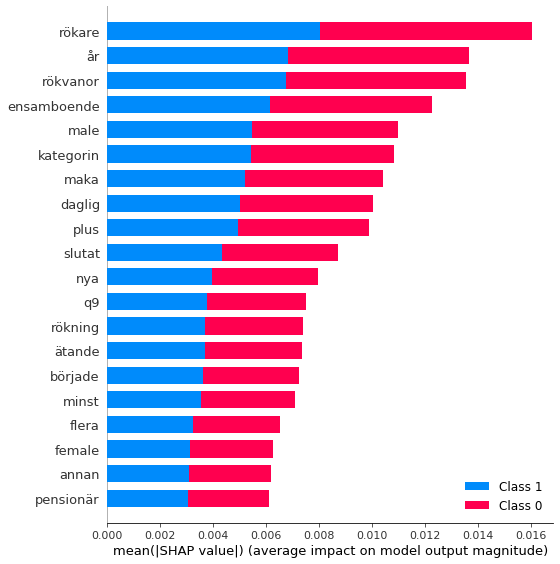

In [21]:
rf.fit(X_train, Y_train)
ml_hlp.get_AUC_ROC_value(X_test, Y_test, rf)
# 
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=features)

# shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

In [13]:
# indxes = [9783, 8827, 9890, 8703, 9616, 9791, 9885, 9847, 10429, 9378, 9582, 10443,
#  9632, 9613, 9392, 9992, 9895, 9806, 8962, 9910]
# indxes = [10136, 9683, 9615, 9429, 9872, 9690, 9687, 8702, 8790, 9266, 9651, 9432,
#  9693, 9617, 9277, 9458, 9630, 9697, 10130, 9705]
# list_features = list()
# for index in indxes:
#     list_features.append(features[index])
# print(list_features)
"slut" in data_list[0]
data_list[0].find("bor")

67

In [12]:
idx = data_list[4].find("slut")
print(data_list[4][idx-10:idx+20])
idx

 ja högst slutförd utbildning 


85

In [ ]:
explainer, shap_values = ml_hlp.get_shap_kernel_explainer_and_values(rf, X_train, X_test)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

In [18]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(X_train, mode="classification",
                                             class_names=["yes", "No"])
# explainer
idx = random.randint(1, len(X_test))
print("Prediction : ", rf.predict(X_test[idx].reshape(1,-1)))
print("Actual :     ", Y_test[idx])


Prediction :  [1.]
Actual :      2.0


In [ ]:
explanation = explainer.explain_instance(X_test[idx], rf.predict_proba)
# explanation

In [ ]:
explanation.show_in_notebook()

In [26]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
# import pandas as pd

# from sklearn.svm import SVC
# from sklearn import datasets
from sklearn.model_selection import GridSearchCV
# from sklearn.experimental import enable_halving_search_cv  # noqa
# from sklearn.model_selection import HalvingGridSearchCV

In [27]:
rng = np.random.RandomState(0)
# X, y = datasets.make_classification(n_samples=1000, random_state=rng)

gammas = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
Cs = [1, 10, 100, 1e3, 1e4, 1e5]
param_grid = {"gamma": gammas, "C": Cs}

clf = SVC(random_state=rng)

# tic = time()
# gsh = HalvingGridSearchCV(
#     estimator=clf, param_grid=param_grid, factor=2, random_state=rng
# )
# gsh.fit(X_train, Y_train)
# gsh_time = time() - tic

tic = time()
gs = GridSearchCV(estimator=clf, param_grid=param_grid)
gs.fit(X_train, Y_train)
gs_time = time() - tic

In [28]:
gs_time

361.76117157936096

In [30]:
gs.best_estimator_

SVC(C=10, gamma=0.1, random_state=RandomState(MT19937) at 0x2AE9278AD08)